In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import os

In [2]:
# clusters : 'N','Y'
# frame/seg : 'F','S'
# cwt : '-','N','Y'
# window : '-','F','H'
# model : ['svm', 'RF', 'DNN', 'LSTM']

# [acc  ,FA  ,DR  ] ph7.4 train
# [acc.1,FA.1,DR.1] ph7.4 test
# [acc.2,FA.2,DR.2] ph7.4 true test
# [acc.3,FA.3,DR.3] sel 1 train
# [acc.4,FA.4,DR.4] sel 1 test
# [acc.5,FA.5,DR.5] sel 1 true test

# colors 'r','orange','y','g','c','b','m'

In [3]:
df = pd.read_csv('../final_data/result1.csv')

In [4]:
save_root = '../final_data/analysis_plot/'

### Graph 1

In [ ]:
# compare
for compare in [0,1,2,3,4]:# 0 cluster, 1 frame/seg, 2 cwt, 3 window, 4 model
    # axis select
    for ax1, ax2 in [[0,1],[0,2],[1,2]]:
        # axes
        axes = ['Accuracy', 'False Alerm', 'Detection Rate']
        axess = ['ACC','FA','DR']
        # subplots
        cols = [['acc'  ,'FA'  ,'DR'  ],['acc.1','FA.1','DR.1'],['acc.2','FA.2','DR.2'],
                ['acc.3','FA.3','DR.3'],['acc.4','FA.4','DR.4'],['acc.5','FA.5','DR.5']]
        subtitles = ['train pH7.4','test pH7.4','true test pH7.4',
                    'train Select 1','test Select 1','true test Select 1']
        # select exp
        compares = {
            0:['N','Y'],
            1:['F','S'],
            2:['-','N','Y'],
            3:['-','F','H'],
            4:['svm', 'RF', 'DNN', 'LSTM']
        }
        legends = {
            0:['No cluster', 'Add cluster'],
            1:['Frame', 'Segment'],
            2:['frame','No CWT', 'Add CWT'],
            3:['frame','Full window', 'Half window'],
            4:['SVM', 'Random Forest', 'DNN', 'LSTM']
        }
        cmp_titles = {
            0:'Clustser',
            1:'FrameOrSegment',
            2:'CWT',
            3:'Window',
            4:'Model'
        }
        colors = cm.rainbow(np.linspace(0, 1, len(compares[compare])))
        title = cmp_titles[compare]+'_Compare_'+axess[ax1]+'-'+axess[ax2]
        save_path = save_root+title+'/'
        if not os.path.isdir(save_path):
            os.makedirs(save_path)

        for i in range(6):
            ax = cols[i]
            plt.figure()
            for j, cmp in enumerate(compares[compare]):
                x = df[df.iloc[:,compare]==cmp][ax[ax1]].tolist()
                y = df[df.iloc[:,compare]==cmp][ax[ax2]].tolist()
                plt.scatter(x,y, color=colors[j], label=legends[compare][j])
            plt.title(subtitles[i])
            plt.xlim(0,1)
            plt.xlabel(axes[ax1])
            plt.ylim(0,1)
            plt.ylabel(axes[ax2])
            plt.legend()
            # plt.savefig(save_path+title+str(i+1)+'.png')

### Graph2

In [ ]:
# compare
compare = 0:# 0 cluster, 1 frame/seg, 2 cwt, 3 window, 4 model
# axis select
for axi ,[ax1, ax2] in enumerate([[0,1],[0,2],[1,2]]):
    # axes
    axes = ['Accuracy', 'False Alerm', 'Detection Rate']
    axess = ['ACC','FA','DR']
    # subplots
    cols = [['acc'  ,'FA'  ,'DR'  ],['acc.1','FA.1','DR.1'],['acc.2','FA.2','DR.2'],
            ['acc.3','FA.3','DR.3'],['acc.4','FA.4','DR.4'],['acc.5','FA.5','DR.5']]
    subtitles = ['train pH7.4','test pH7.4','true test pH7.4',
                'train Select 1','test Select 1','true test Select 1']
    # select exp
    compares = {
        0:['N','Y'],
        1:['F','S'],
        2:['N','Y'],
        3:['F','H'],
        4:['svm', 'RF', 'DNN', 'LSTM']
    }
    legends = {
        0:['No cluster', 'Add cluster'],
        1:['Frame', 'Segment'],
        2:['frame','No CWT', 'Add CWT'],
        3:['frame','Full window', 'Half window'],
        4:['SVM', 'Random Forest', 'DNN', 'LSTM']
    }
    cmp_titles = {
        0:'Clustser',
        1:'FrameOrSegment',
        2:'CWT',
        3:'Window',
        4:'Model'
    }
    colors = cm.rainbow(np.linspace(0, 1, len(compares[compare])))
    title = cmp_titles[compare]+'_Compare_'+axess[ax1]+'-'+axess[ax2]
    save_path = save_root+title+'/'
    if not os.path.isdir(save_path):
        os.makedirs(save_path)

    for i in range(6):
        ax = cols[i]
        plt.figure()
        for j, cmp in enumerate(compares[compare]):
            x = df[df.iloc[:,compare]==cmp][ax[ax1]].tolist()
            y = df[df.iloc[:,compare]==cmp][ax[ax2]].tolist()
            plt.scatter(x,y, color=colors[j], label=legends[compare][j])
        plt.title(subtitles[i])
        plt.xlim(0,1)
        plt.xlabel(axes[ax1])
        plt.ylim(0,1)
        plt.ylabel(axes[ax2])
        plt.legend()
        #plt.savefig(save_path+title+str(i+1)+'.png')

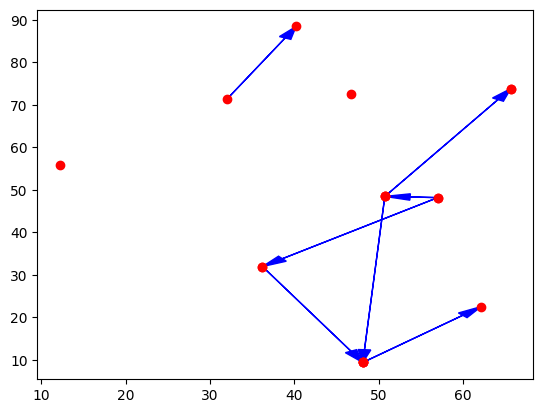

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches

data = np.genfromtxt('file1.dat', delimiter=',', skip_header=1, names=['MAG', 'X0', 'Y0','X1','Y1'])
plt.scatter(data['X0'], data['Y0'], color='r', zorder=10)
plt.scatter(data['X1'], data['Y1'], color='r', zorder=10)

for d in data:
    if(d['MAG'] > 0):
        plt.arrow(d['X0'],d['Y0'],d['X1']-d['X0'], d['Y1']-d['Y0'], 
         shape='full', color='b', lw=1, length_includes_head=True, 
         zorder=0, head_length=3., head_width=1.5)

plt.show()